In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from Spectrogram import Spectrogram

In [2]:
def make_data_path(path_name):
    return os.path.join(os.path.dirname("__file__"), "", ) + path_name

In [3]:
data_paths = [
    make_data_path(path_name="/homes/amsolomes1/birdSongData/ff1010bird/txt/"),
    make_data_path(path_name="/homes/amsolomes1/birdSongData/warblrb10k/txt/"),
    make_data_path(path_name="/homes/amsolomes1/birdSongData/birdVox-DCASE/txt/")
]

In [4]:
bbox = pd.read_csv("/homes/amsolomes1/birdSongData/birdVox-DCASE/BirdVox-DCASE-20k.csv")

In [5]:
def get_label(item_id):
    return bbox[bbox["itemid"] == item_id]["hasbird"].values[0]

In [6]:
len(os.listdir(data_paths[0]))

7690

/homes/amsolomes1/birdSongData/ff1010bird/txt/164176.TXT
(998, 40)


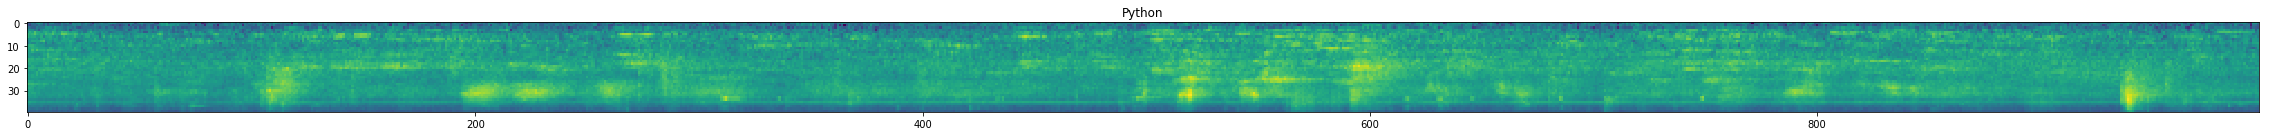

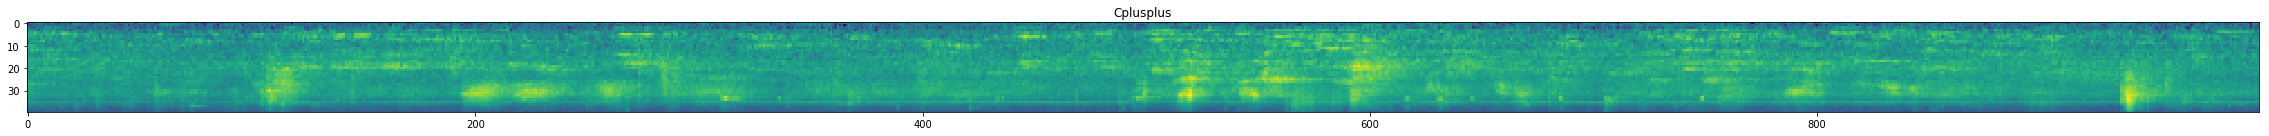




/homes/amsolomes1/birdSongData/ff1010bird/txt/161278.TXT
(998, 40)


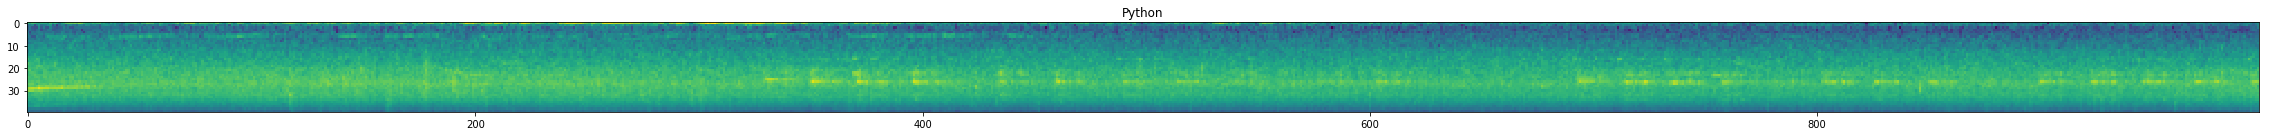

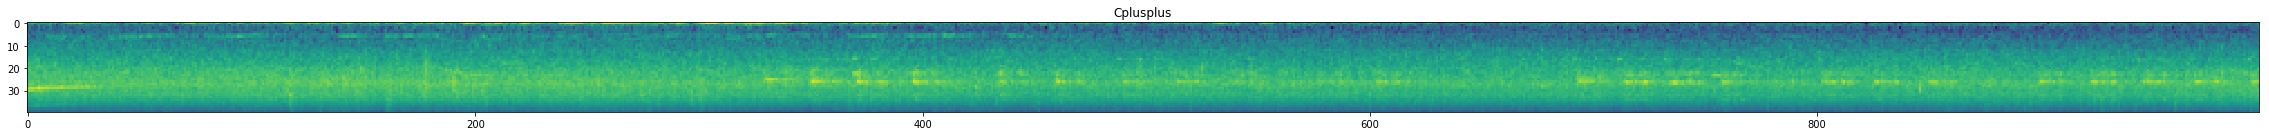




/homes/amsolomes1/birdSongData/ff1010bird/txt/189868.TXT
(998, 40)


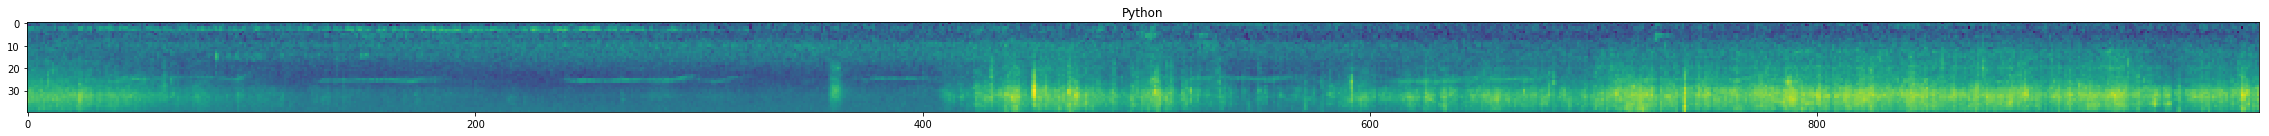

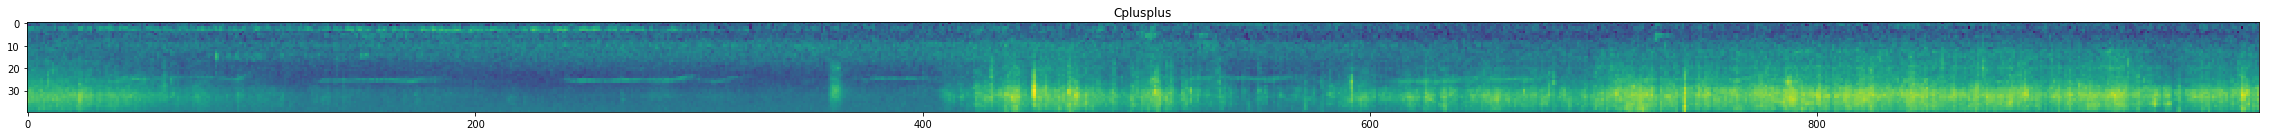




/homes/amsolomes1/birdSongData/ff1010bird/txt/117647.TXT
(998, 40)


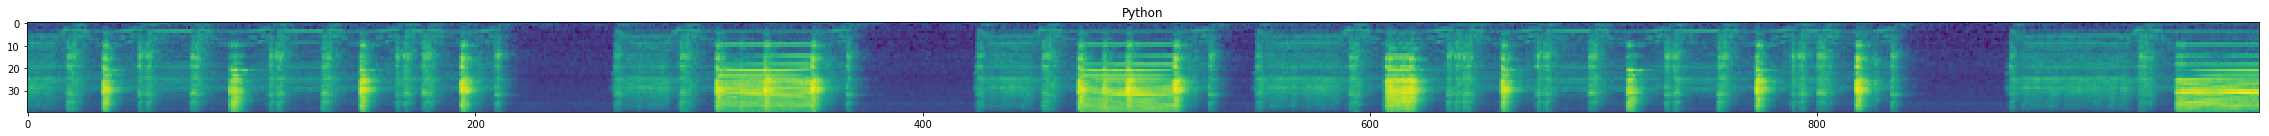

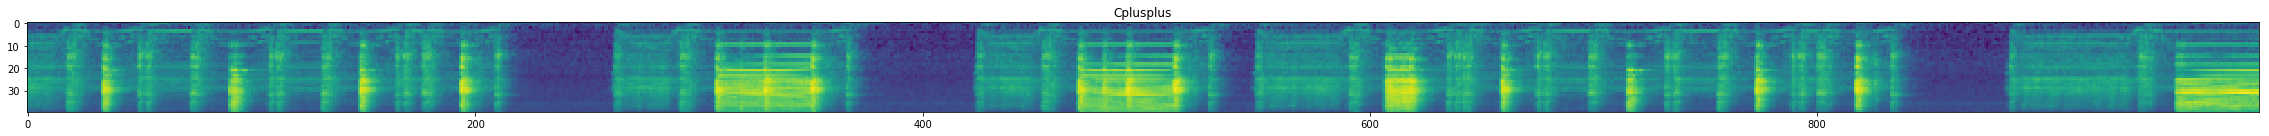




/homes/amsolomes1/birdSongData/ff1010bird/txt/128706.TXT
(998, 40)


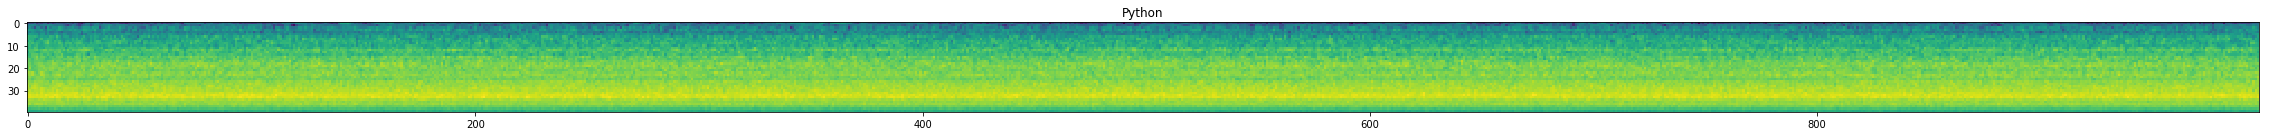

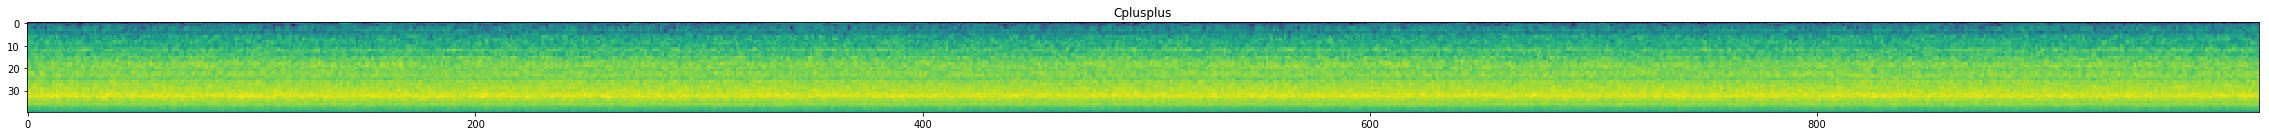




/homes/amsolomes1/birdSongData/ff1010bird/txt/38304.TXT
(998, 40)


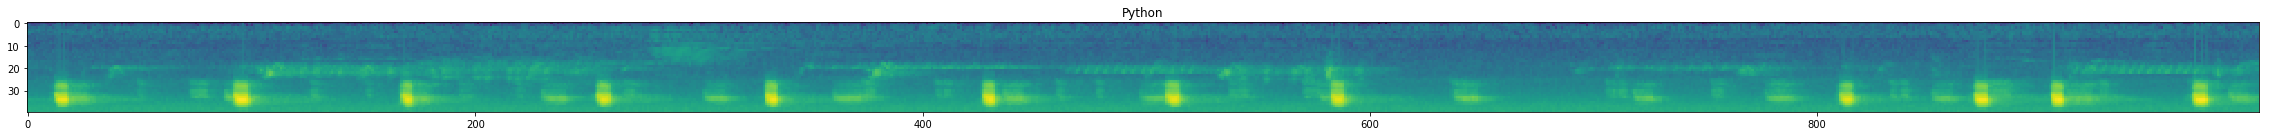

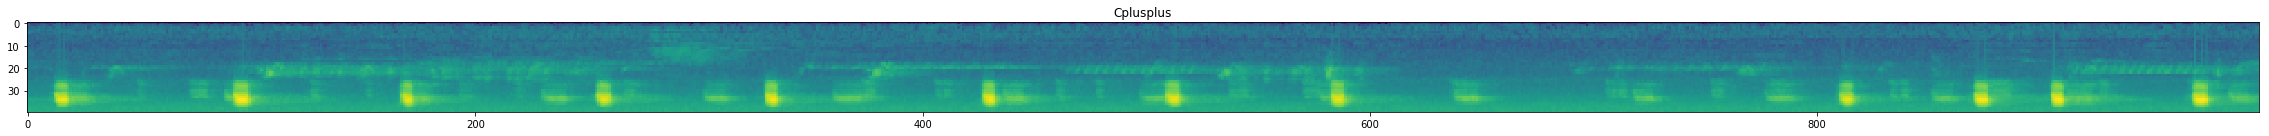




/homes/amsolomes1/birdSongData/ff1010bird/txt/76903.TXT
(998, 40)


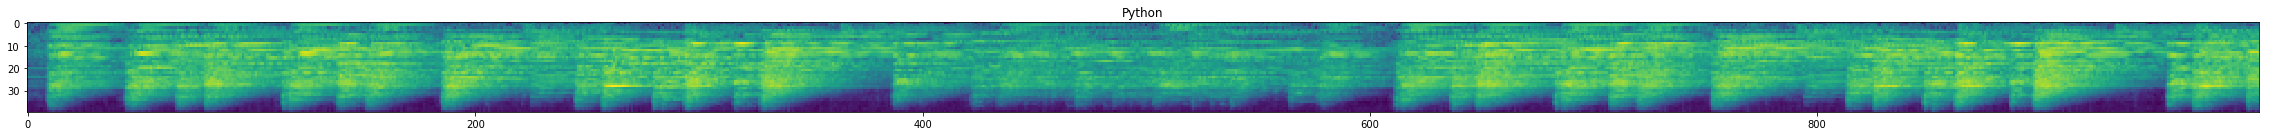

In [ ]:
indices = np.random.randint(low=0, high=len(os.listdir(data_paths[0])), size=10)
correct = 0
for ind in indices:
    file_name = os.listdir(data_paths[0])[ind]
    with open(data_paths[0] + file_name, "r") as handle:
        spectrogram_data = handle.read().split()
    
    print(data_paths[0] + file_name)
    # print(get_label(item_id=file_name.split(".")[0]))
    #python
    spec = Spectrogram((data_paths[0] + file_name).replace("txt", "wav").replace("TXT", "wav"))
    python_spectrogram = spec.process()
    print(python_spectrogram.shape)
    # C++
    spectrogram_data = [eval(x) for x in spectrogram_data]
    spectrogram_data = np.array(spectrogram_data).reshape(python_spectrogram.shape)
    
    plt.figure(figsize=(40, 20))
    plt.title("Python")
    plt.imshow(python_spectrogram.T)
    plt.show()
    
    # Cplusplus
    plt.figure(figsize=(40, 20))
    plt.title("Cplusplus")
    plt.imshow(spectrogram_data.T)
    plt.show()
    
#     # diff
#     plt.figure(figsize=(40, 20))
#     plt.title("DIFFERENCE")
#     plt.imshow(python_spectrogram.T - spectrogram_data.T)
#     plt.show()
    
    print("\n\n")

In [13]:
import IPython
# /homes/amsolomes1/birdSongData/birdVox-DCASE/txt/075b574e-6cfd-4e4e-ac19-ffb5891e31d7.TXT
IPython.display.Audio("/homes/amsolomes1/birdSongData/birdVox-DCASE/wav/d87311da-d29d-4dc2-a3fa-04a160ebe7c6.wav")